In [23]:
import matplotlib.pyplot as plt
import numpy as np
from HARK.interpolation.sklearninterp import GaussianProcessCurvilinearInterp
from scipy.ndimage import map_coordinates
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, StandardScaler


In [24]:
n = 50
m = 50
x_grid = np.linspace(1, 11, n)
y_grid = np.empty(m)

x_mat, y_mat = np.meshgrid(x_grid, y_grid, indexing="ij")
u_mat = np.empty_like(x_mat)

u_mat.shape


(50, 50)

In [25]:
for i in range(u_mat.shape[1]):
    u_mat[:, i] = (i + 1) * 2
    y_mat[:, i] = u_mat[:, i] / x_mat[:, i]


In [26]:
x_new = np.linspace(5, 10, 100)
y_new = np.linspace(5, 10, 100)
x_new, y_new = np.meshgrid(x_new, y_new, indexing="ij")


In [27]:
degree = 3

X_train = np.c_[x_mat.ravel(), y_mat.ravel()]
coords = np.mgrid[[slice(0, dim) for dim in x_mat.shape]]
y_train = coords[0].ravel()


In [28]:
X_train.shape


(2500, 2)

In [29]:
model = make_pipeline(
    StandardScaler(), PolynomialFeatures(
        degree), RidgeCV(alphas=np.logspace(-6, 6, 13))
)
model.fit(X_train, y_train)
x_idx = model.predict(np.c_[x_new.ravel(), y_new.ravel()])

In [30]:
y_train = coords[1].ravel()
model.fit(X_train, y_train)
y_idx = model.predict(np.c_[x_new.ravel(), y_new.ravel()])


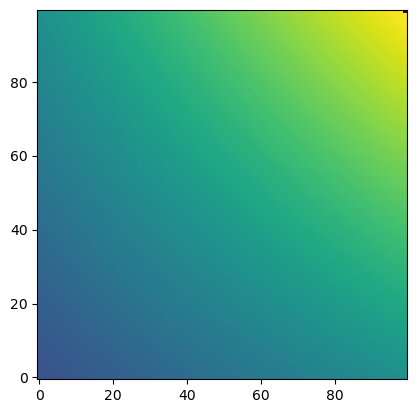

In [31]:
u_interp = map_coordinates(u_mat, [x_idx, y_idx], order=1)
plt.imshow(u_interp.reshape(x_new.shape), origin="lower")


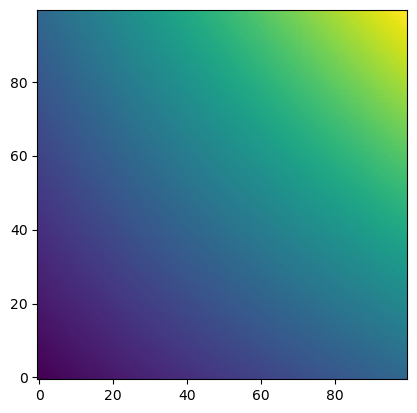

In [32]:
poly_interp = GaussianProcessCurvilinearInterp(
    u_mat, [x_mat, y_mat], feature="spl", degree = 3, n_knots = 5)
u_poly = poly_interp(x_new, y_new)
plt.imshow(u_poly, origin="lower")

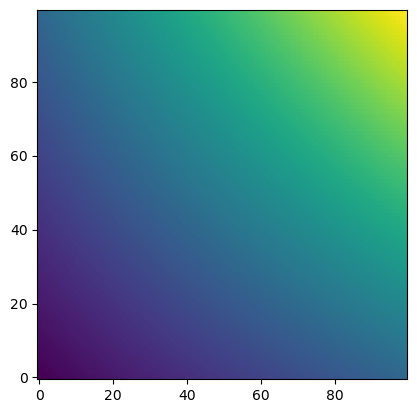

In [33]:
plt.imshow(x_new * y_new, origin="lower")
